<a href="https://colab.research.google.com/github/shi00001/test-demo/blob/master/stock_analysis3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


- 时序模型（Time Series Models）可以用于以下方面：

  - 1. 信号处理：时序模型可以用于处理信号数据，如音频信号、语音信号、生物信号等。它们可以帮助提取信号的特征、降噪、分割等。

  - 2. 时间序列预测：时序模型可以用于预测未来的时间序列数据，如股票价格、气象数据、销售量等。常见的时序模型包括自回归移动平均模型（ARMA）、自回归积分滑动平均模型（ARIMA）、长短期记忆网络（LSTM）等。

  - 3. 自然语言处理：在自然语言处理中，时序模型可以用于处理文本数据的顺序信息，如序列标注、机器翻译、语音识别等任务。递归神经网络（RNN）和其变种模型如长短期记忆网络（LSTM）和门控循环单元（GRU）常被用于处理序列数据。

  - 4. 动作识别与行为建模：时序模型可以用于动作识别和行为建模，例如通过分析视频序列来识别人体动作、交通行为、手势识别等。


- 以下是一些不能使用时序模型的情况：

  - 1. 数据独立性：当数据之间没有时间上的相关性或顺序关系时，时序模型就不适用。例如，对于独立的样本数据，使用时序模型进行建模往往没有意义。

  - 2. 静态数据：如果数据是静态的，没有时间维度，那么时序模型就没有必要。时序模型是专门用于处理随时间变化的数据。

  - 3. 高度噪声数据：当数据中存在大量噪声或不可预测的不确定性时，时序模型的性能可能会受到影响。噪声的存在可能会导致模型难以捕捉到真实的时间序列模式。

  - 4. 缺乏时间信息或时间间隔不规则：如果数据中缺乏明确的时间信息或时间间隔不规则，时序模型的应用可能会受到限制。


- 因此，在使用时序模型时，我们需要谨慎考虑模型的适用范围和局限性，并结合实际情况和领域知识来进行分析和判断。

### **# 1. ARIMA模型**

- ARIMA(p,d,q)全称为自回归差分移动平均模型（Autoregressive Integrated Moving Average）是一种常用的时间序列分析和预测方法。

  - 1. p代表“自回归部分”（AR）。描述的是状态本身的滞后影响及其权重。具体的数学形式如下：
  
    AR:$ Y_t = c + \varphi_1 Y_{t-1} + \varphi_2 Y_{t-2} + \ldots + \varphi_p Y_{t-p} + \xi _t $
   - 其中，$\varphi_1,\varphi_2,...,\varphi_p$是模型参数，c是常数，$\xi _t$是白噪声。这个方程的阶数 p 决定了模型回溯观测值的数量。
   
  - 2. d 代表差分过程（I）。用于使非平稳时间序列达到平稳，通过一阶或者二阶等差分处理，消除了时间序列中的趋势和季节性因素。具体数学公式如下：
    滞后运算是“向后移动一个单位”的运算，当用于时间序列时，它特指“向过去移动一个时间单位”的运算。大部分时候，滞后运算被简写为字母B（Backshift）或者字母（Lag）k。
    
      $d-order-y = (1 - B)^{d} y_{t} $  
      
  - 3. q 代表 “移动平均部分”（MA）。描述的是时序过程中当前及历史噪声的影响及其权重。具体的数学形式如下：
  
    MA:

    $Y_t$ = $\mu$ + $\epsilon_t$+ $\theta_1$ $\epsilon_{t-1}$ + $\theta_2$ $\epsilon_{t-2}$ + $\ldots$ + $\theta_p$ $\epsilon_{t-p}$
    
    - 其中，$\theta_1$,$\theta_2$,...,$\theta_p$ 是模型参数，c是常数，$\epsilon_t$是白噪声，$\epsilon_{t-1}$,$\epsilon_{t-2}$,...,$\epsilon_{t-q}$。这个方程的阶数 q 决定了模型回溯白噪声的数量。

- 1.1自相关函数ACF
  - x(t)同时还会受到中间k-1个随机变量x(t-1)x(t-2)x(t-k+1)的影响......而这k-1个随机变量又都和x(t-k)具有相关关系所以自相关系数p(k)里实际掺杂了其他变量对x(t)与x(t-k)的影响。公式如下：
  
     $ACF(k)$ = $\frac{Cov(Y_t, Y_{t-k})}{Var(Y_t)}$
     
   - 其中，(k) 表示滞后阶数（Lag），$(Y_t)$ 和 $(Y_{t-k})$ 分别表示时间序列在时刻 (t) 和滞后 (k) 个单位时间的值。
   - ACF 的取值范围是 -1 到 1。当 ACF 接近 1 时，表示两个时间点的观测值高度正相关；当 ACF 接近 -1 时，表示两个时间点的观测值高度负相关；当 ACF 接近 0 时，表示两个时间点的观测值之间的相关性较弱。

- 1.2偏相关函数PACF
   - 剔除了中间k-1个随机变量Y(t-1)、Y(t-2)、…Y(t-k+1)的干扰之后Y(t-k)对Y(t)影响的相关程度。
   

   $ PACF(k) = \frac{Cov(Y_t-E[Y_t | Y_{t-1},..., Y_{t-k+1}], Y_{t-k} - E[Y_{t-k} |Y_{t-k+1},...,Y_{t-1}]}
{Var(Y_{t})} $


  - PACF的取值范围也是 -1 到 1。当 PACF 接近 1 时，表示两个时间点的观测值高度正相关；当 PACF 接近 -1 时，表示两个时间点的观测值高度负相关；当 PACF 接近 0 时，表示两个时间点的观测值之间的直接相关性较弱。

 - ARIMA模型的建立包括以下步骤：

    - 1.平稳性检验（ADF单位根检验法）
    
    - 2.估计差分阶数d：根据平稳性检验结果，确定需要进行几次差分。
    
    - 3.通过ACF自相关图和PACF偏自相关图，确定AR和MA的阶数p和q。
    
    - 4.构建ARIMA(p,d,q)模型。
    
    - 5.进行预测：利用已建立的ARIMA模型对未来时间点的值进行预测。
- ARIMA模型在许多领域中被广泛应用，例如经济学、金融学、气象学等，用于分析和预测时间序列数据的趋势和周期性。

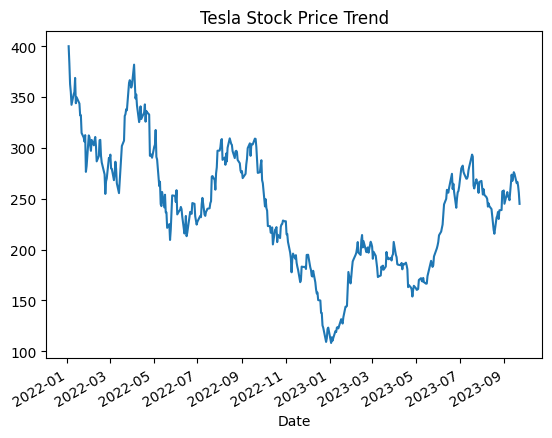

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
#from statsmodels.tsa.arima.model import ARIMA
# 设置开始日期和结束日期
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 9, 25)

# 获取特斯拉股票数据
data = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/TSLA?period1={}&period2={}&interval=1d&events=history'.format(int(start_date.timestamp()), int(end_date.timestamp())))

# 将日期列转换为日期时间类型
data['Date'] = pd.to_datetime(data['Date'])

# 设置日期为索引
#data.set_index('Date', inplace=True)

# 使用旧版的Int64Index类型来设置索引
#df.set_index(pd.Int64Index(range(len(df))), inplace=True)


data.set_index('Date', inplace=True)

# 绘制股价走势图
data['Adj Close'].plot()
plt.title('Tesla Stock Price Trend')
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -2.560506
p-value                          0.101438
#Lags Used                       9.000000
Number of Observations Used    423.000000
Critical Value (1%)             -3.445904
Critical Value (5%)             -2.868397
Critical Value (10%)            -2.570423
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -5.264606
p-value                          0.000006
#Lags Used                       8.000000
Number of Observations Used    423.000000
Critical Value (1%)             -3.445904
Critical Value (5%)             -2.868397
Critical Value (10%)            -2.570423
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.966943e+00
p-value                        2.848237e-12
#Lags Used                     1.700000e+01
Number of Observations Used    4.130000e+02
Critical Value (1%)           -3.446283e+00
Critical Value (5%)           -2.868564e+00
Critical Value (10%)     

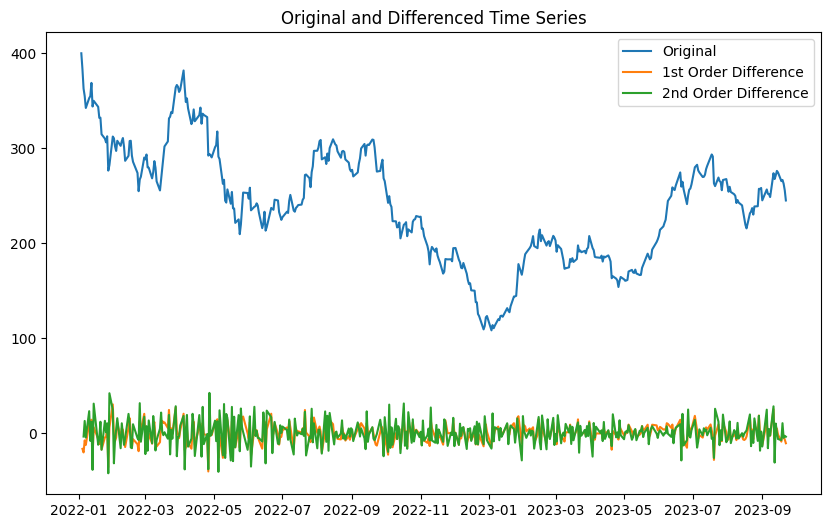

In [3]:
from statsmodels.tsa.stattools import adfuller
# 接下来可以使用 adfuller 函数进行单位根检验

# 创建一个函数来检查数据的平稳性
def test_stationarity(timeseries):
    # 执行Dickey-Fuller测试
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)


# 检查原始数据的平稳性
test_stationarity(data['Close'])

# 进行一阶差分
data['first_difference'] = data['Close'] - data['Close'].shift(1)

# 检查一阶差分后的数据的平稳性
test_stationarity(data['first_difference'].dropna())

# 进行二阶差分
data['second_difference'] = data['first_difference'] - data['first_difference'].shift(1)

# 检查二阶差分后的数据的平稳性
test_stationarity(data['second_difference'].dropna())


# 可视化原始数据和差分后的数据
plt.figure(figsize=(10, 6))


plt.plot(data['Close'], label='Original')
plt.plot(data['first_difference'], label='1st Order Difference')
plt.plot(data['second_difference'], label='2nd Order Difference')
plt.legend(loc='best')
plt.title('Original and Differenced Time Series')
plt.show()

可知：

原始数据：Dickey-Fuller检验的p值大于常用的显著性水平（例如0.05或0.01）。这意味着我们无法拒绝原假设（时间序列是非平稳的）。因此，我们可以确认原始数据是非平稳的。

一阶差分数据：一阶差分后，p值远小于0.05或0.01，我们可以拒绝原假设（时间序列是非平稳的），因此我们可以认为一阶差分后的数据是平稳的。

二阶差分数据：二阶差分后，p值也是远小于0.05或0.01，我们也可以拒绝原假设（时间序列是非平稳的），我们可以认为二阶差分后的数据是平稳的。

因此，从上述结果来看，一阶差分已经足够使数据平稳。这就表明了差分的作用：它可以帮助我们把一个非平稳的时间序列转换成平稳的时间序列，从而更好地进行进一步的时间序列分析或预测。

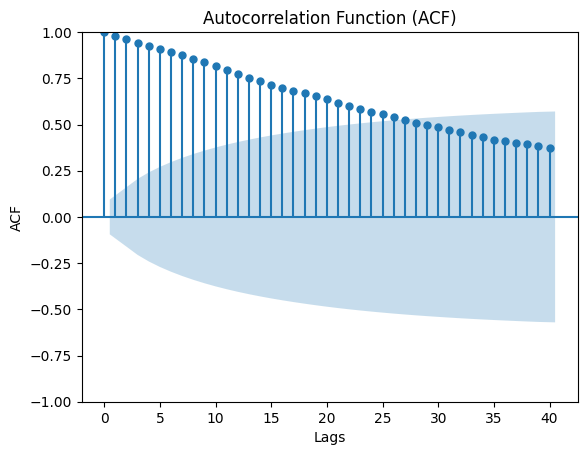

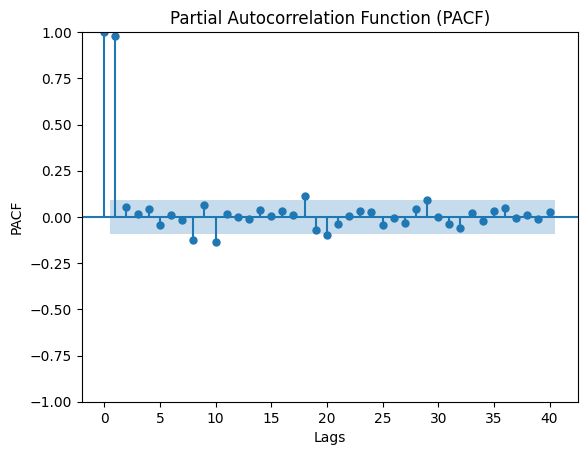

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
closing_prices = data['Close']


#绘制ACF图
plot_acf(closing_prices, lags=40)
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF)')
plt.show()


#绘制PACF图
plot_pacf(closing_prices, lags=40)
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


经判断p=20;q=10

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

Next three months forecast: 433    248.389382
434    249.087949
435    251.842202
436    246.670099
437    245.737037
          ...    
518    242.298914
519    242.356102
520    240.615052
521    239.483184
522    239.108694
Name: predicted_mean, Length: 90, dtype: float64


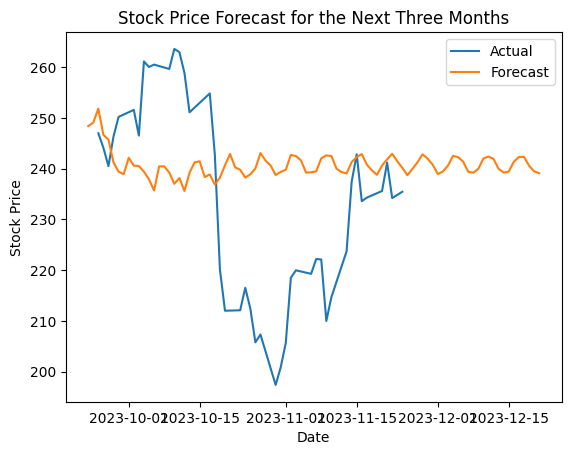

In [5]:
from statsmodels.tsa.arima.model import ARIMA

# 创建 AMIAR 模型
model = ARIMA(closing_prices, order=(20, 1, 10))
results = model.fit()

# 进行多步的未来预测 预测三个月
forecast = results.forecast(steps=90)
print("Next three months forecast:", forecast)


#获取2023,9,25以后44天的数据
start_date = datetime(2023, 9, 25)
end_date = datetime.now()

# 获取特斯拉股票数据
data2 = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/TSLA?period1={}&period2={}&interval=1d&events=history'.format(int(start_date.timestamp()), int(end_date.timestamp())))

# 将日期列转换为日期时间类型
data2['Date'] = pd.to_datetime(data2['Date'])

# 设置日期为索引
data2.set_index('Date', inplace=True)

closing_prices2 = data2['Close']
# 绘制原始数据
plt.plot(closing_prices2, label='Actual')

# 可视化真实值和预测值（真实值只有44天数据）

plt.plot(pd.date_range(start=closing_prices.index[-1], periods=91, closed='right'), forecast, label='Forecast')

# 图表标签和标题
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Forecast for the Next Three Months')
plt.legend()
plt.show()

In [6]:
#预测效果
#均方根误差（RMSE）：通过计算预测值与实际值之间的平均差异来评估预测模型的准确性。
from sklearn.metrics import mean_squared_error

# 均方根误差
rmse = mean_squared_error(closing_prices2, forecast[:44], squared=False)

print("预测效果：",rmse)

预测效果： 20.093705240654852


一般来说，RMSE的值越小越好，因为它表示模型预测值与真实值之间的平均偏差，值越小说明模型的预测能力越强。

# 3.**Prophet模型**


-  在时间序列分析领域，有一种常见的分析方法叫做时间序列的分解（Decomposition of Time Series），它把时间序列分成几个部分，分别是季节项，趋势项，剩余项。
 - 加法形式：

    $y(t)$ = $S(t)$ + $T(t)$ + $R(t)$
 - 乘法形式：

    $y(t)$ = $S(t)$ × $T(t)$ × $R(t)$

- Prophet基于这种方法进行了必要的改进和优化。Prophet模型是一个加法回归模型，将时间序列数据分解为趋势项（trend）、季节性项（seasonality）和残差项。趋势项表示长期趋势的变化，季节性项表示周期性模式的变化，而残差项则捕捉了未被趋势和季节性解释的其它波动。可以表示为以下形式：（实际中还需要加入假期项）

   $ Y(t) = g(t) + s(t)  + h(t)+ \epsilon_t $

- Prophet算法就是通过拟合这几项，最后把它们累加起来就得到时间序列的预测值。
- Prophet模型是Facebook于2017年发布开源的时间序列预测框架。Prophet适用于各种具有潜在特殊特征的预测问题包括广泛的业务时间序列问题，并且其对时间序列趋势变化点的检测、季节性、节假日以及突发事件具有更好的拟合效果。
  
  -其中，Y(t)是在时间点t的观测值；
     - g(t)表示趋势项，表示时间序列在非周期上面的变化趋势；
     - s(t)表示季节性项，表示时间序列的周期性变换；
     - h(t) 表示节假日项，表示在当天是否存在节假日；
     - $\epsilon_t$ 是误差项或称剩余项；

- 具体来说，Prophet模型将趋势项 g(t)建模为一个非线性函数，可以通过添加多项式、幂函数或S型函数(logistic函数)来适应不同类型的趋势变化。季节性项s(t)被建模为一组周期函数的线性组合，可以自动检测并适应不同时间尺度的周期性模式。

- 4.1 趋势项g(t)  

  - 趋势项是Prophet的核心组件，它用于分析和拟合时间序列的非周期变化，其使用了两个函数来描述数据的长期趋势：一个分段线性函数和一个饱和增长函数。分段线性函数用于捕捉数据的突变点，而饱和增长函数则用于捕捉长期的增长趋势。
  - 饱和增长趋势函数公式：
  
   $a(t) = \sum_{i=1}^{N} (a_i + b_i(t - t_{i-1})) \cdot I(t \geq t_{i-1})$
   - 其中，N 是突变点的数量，$a_i$和 $b_i$是相应突变点处的截距和斜率，$t_{i-1}$是第 i 个突变点之前的时间，$I(t≥t_{i−1})$是指示函数，当$t≥t_{i−1}$时值为 1，否则为 0。
  - 分段线性趋势函数公式：
  
   $b(t) = \frac{C}{1 + e^{-k(t - m)}}$
   - 其中，C 是饱和值，k 是增长速率，m 是饱和点的时间。
   
  - 最终趋势模型可以表示为：
  
   $g(t) = a(t) + b(t)$

- 4.2 季节项s（t）
 - s（t）代表时间序列的周期性变化，可用于模拟周、月、年等各种周期变化趋势，由傅立叶级数表达，如式所示：

  $s(t) = a_0 + \sum_{n=1}^{N} \left( a_n \cos\left(\frac{2\pi nt}{T}\right) + b_n \sin\left(\frac{2\pi nt}{T}\right) \right)$
 - 其中：N表示模型中使用该周期的个数；T表示期望时间序列的周期长度；2n表示拟合季节性需要估计的参数个数。

   - N的设定需要结合T进行考虑，对于年的周期性，设定T=365.25，N为10；对于每周的季节性，T设置为7，N则设置为3，N越大，拟合复杂的季节性越好。

- 4.3 假期项h（t）

 - h（t）表示非周期性的不规律的假期影响。模型通过自定义假期列表实现节假日或突发事件场景下的预测。
  
    模型原理：h(t) = Z(t)k

- 其中：Z（t）为指示函数；k表示节假日的影响范围。


- 4.4 误差项$\epsilon_t$
  -  表示模型中未反映的噪声部分并假设噪声因子服从正态分布。
  

- Prophet模型的优缺点
  - 优点：

     - 1.可拓展：曲线拟合问题可以很轻松的引入季节和周期性的影响，可以应用于多种数据类型。
     - 2.数据灵活：与ARIM模型不同，曲线拟合问题不需要数据等步长，所以不需要对数据进行一些特殊操作（如插值）。
     - 3.速度快：相比于传统的训练模型，曲线拟合的速度更快，有助于数据迭代。
     - 4.能够自动处理所研究序列中的缺失值和异常值，能够对时间序列的未来趋势进行自动分解和预测。
   - 局限性：

     - 1.无法做到rolling forecasting，prophet训练和模型是分开的，要想更新模型，必须重新训练。
     - 2.模型过于简单，模型的表达能力比较简单。导致训练模型时under-fitting，也就是对于复杂的模式，常常无法学到，预测精度有所折扣。
     - 3.长时间预测不可靠。

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprraxfjet/9x_7ifxk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprraxfjet/odzwuzmo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63397', 'data', 'file=/tmp/tmprraxfjet/9x_7ifxk.json', 'init=/tmp/tmprraxfjet/odzwuzmo.json', 'output', 'file=/tmp/tmprraxfjet/prophet_modelohqrgkr1/prophet_model-20231126065812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:58:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:58:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds        yhat  yhat_lower  yhat_upper
793 2024-09-17  265.565032  204.516454  326.701723
794 2024-09-18  254.402522  198.113664  312.466145
795 2024-09-19  251.871988  188.899709  310.159108
796 2024-09-20  249.871800  189.414114  310.032144
797 2024-09-21  251.054054  191.849437  309.307529


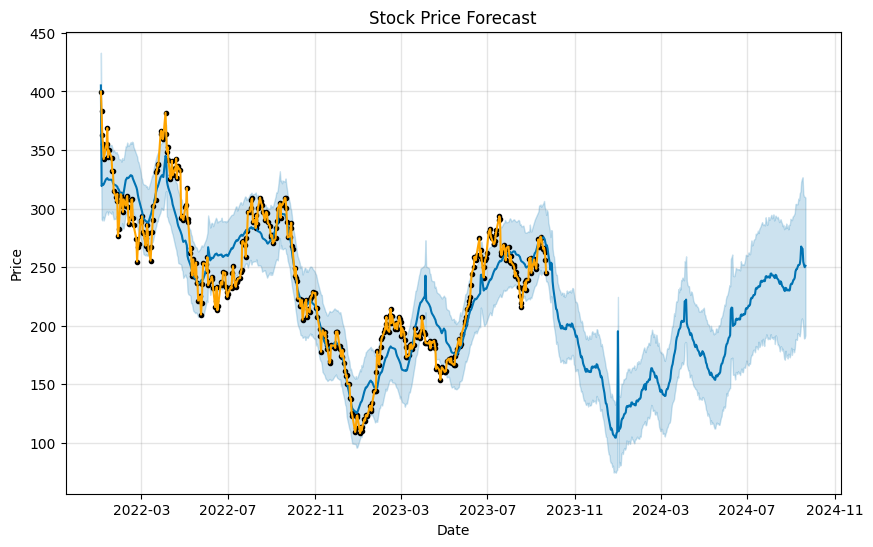

In [14]:
from prophet import Prophet

# 设置开始日期和结束日期
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 9, 25)

# 获取特斯拉股票数据
data = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/TSLA?period1={}&period2={}&interval=1d&events=history'.format(int(start_date.timestamp()), int(end_date.timestamp())))

# 将日期列转换为日期时间类型
data['Date'] = pd.to_datetime(data['Date'])



# 准备Prophet所需的数据格式
prophet_data = data[['Date','Close']]
prophet_data = prophet_data.rename(columns={'Date': 'ds', 'Close': 'y'})

# 创建Prophet模型并拟合数据
model = Prophet(yearly_seasonality=True) #默认使用growth = 'linear'
model.add_country_holidays(country_name="CN")
model.fit(prophet_data)

# 预测未来时间段的数据
future = model.make_future_dataframe(periods=365)  # 预测未来1年的数据
forecast2 = model.predict(future)
# 打印预测结果
print(forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# 绘制预测结果图表
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(forecast2, ax=ax)
plt.plot(prophet_data['ds'],prophet_data['y'],label="Actual",color="orange")
ax.set_title('Stock Price Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.grid(True)
plt.show()

In [8]:
#预测效果
#均方根误差（RMSE）：通过计算预测值与实际值之间的平均差异来评估预测模型的准确性。
from sklearn.metrics import mean_squared_error

# 均方根误差
rmse = mean_squared_error(closing_prices2, forecast2['yhat'][:44], squared=False)

print("预测效果：",rmse)

预测效果： 88.7753662541947


RMSE较大，则表示模型的预测精度较低，预测值与实际观测值之间的差异较大。

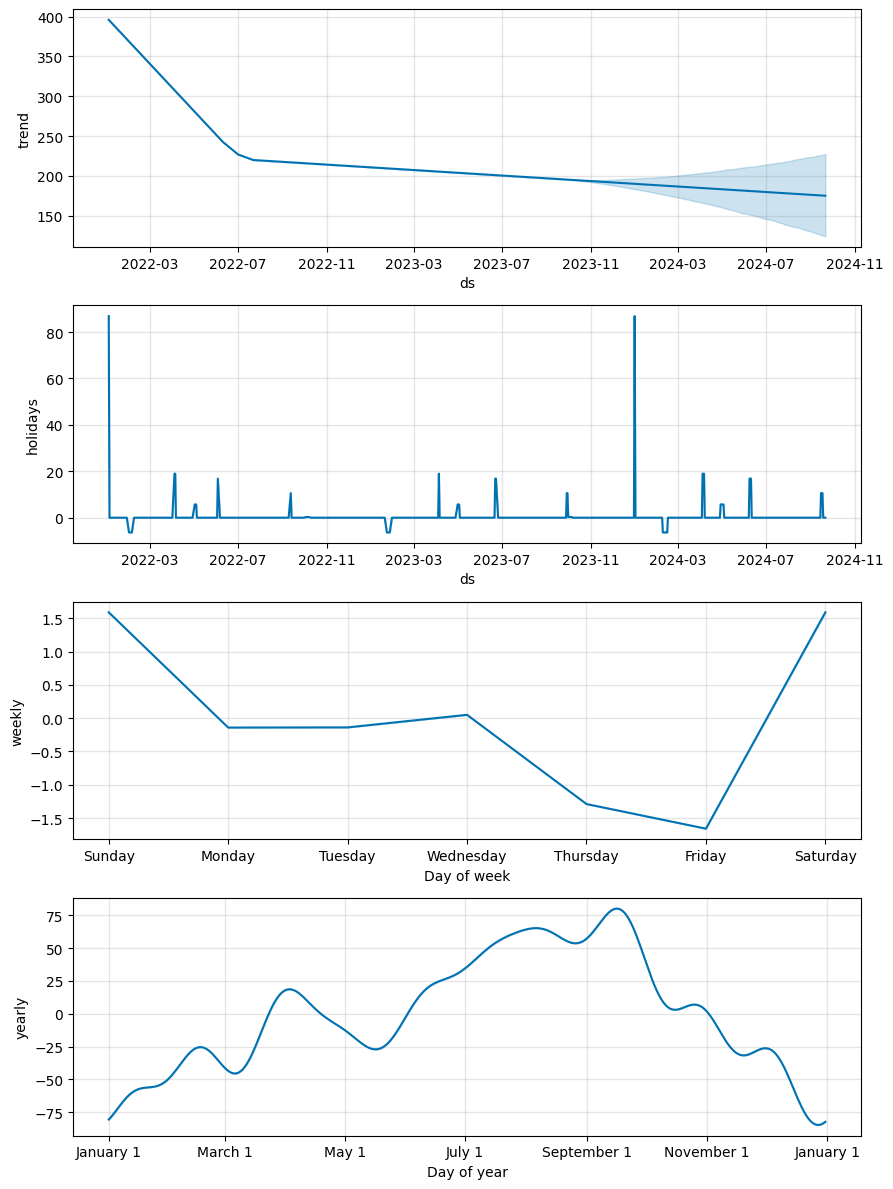

In [9]:
# 预测的成分分析绘图，展示预测中的趋势、假期效应、周效应和年度效应
model.plot_components(forecast2)
plt.show()

In [10]:
print(forecast2.columns)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Chinese New Year (Spring Festival)',
       'Chinese New Year (Spring Festival)_lower',
       'Chinese New Year (Spring Festival)_upper', 'Dragon Boat Festival',
       'Dragon Boat Festival_lower', 'Dragon Boat Festival_upper', 'Labor Day',
       'Labor Day_lower', 'Labor Day_upper', 'Mid-Autumn Festival',
       'Mid-Autumn Festival_lower', 'Mid-Autumn Festival_upper',
       'National Day', 'National Day_lower', 'National Day_upper',
       'New Year's Day', 'New Year's Day_lower', 'New Year's Day_upper',
       'Tomb-Sweeping Day', 'Tomb-Sweeping Day_lower',
       'Tomb-Sweeping Day_upper', 'additive_terms', 'additive_terms_lower',
       'additive_terms_upper', 'holidays', 'holidays_lower', 'holidays_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper

**饱和预测**

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprraxfjet/c3pchwe4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprraxfjet/aog799kl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54592', 'data', 'file=/tmp/tmprraxfjet/c3pchwe4.json', 'init=/tmp/tmprraxfjet/aog799kl.json', 'output', 'file=/tmp/tmprraxfjet/prophet_modelpj643h7j/prophet_model-20231126065949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:59:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:59:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


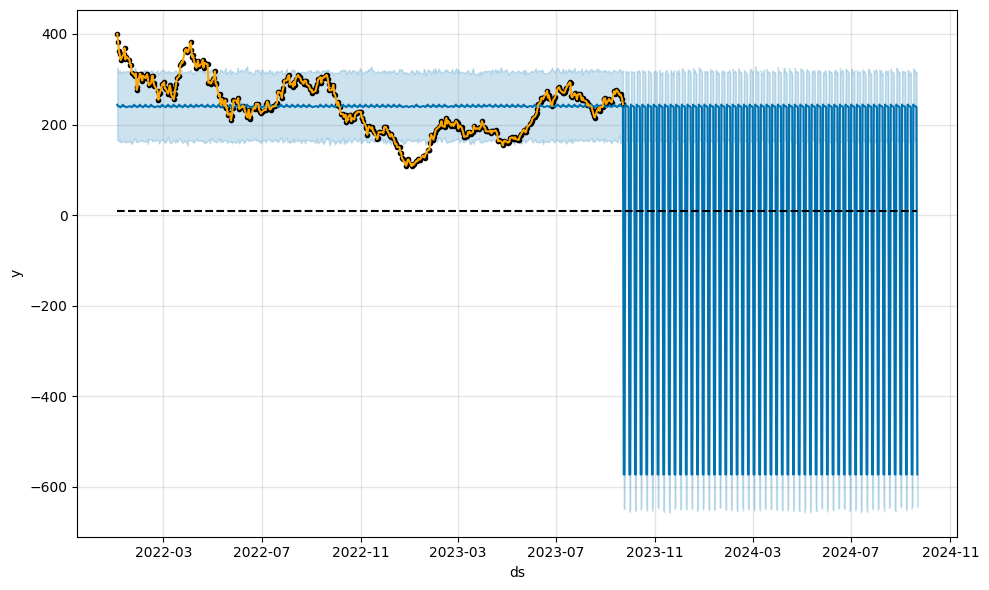

In [15]:
#预测饱和增长

#新建一列 cap 来指定承载能力的大小。
prophet_data['cap'] = 8.5

#构建logistic增长趋势模型
model1 = Prophet(growth='logistic')
#拟合
model1.fit(prophet_data)

#预测1年的数据
future = model1.make_future_dataframe(periods=365)
future['cap'] = 8.5
fcst = model1.predict(future)
fig = model1.plot(fcst)
plt.plot(prophet_data['ds'],prophet_data['y'],label="Actual",color="orange")
plt.show()

1.黑色点表示观测值，即已知的实际数据点。

2.蓝色线表示模型的拟合结果，即在拟合阶段使用历史数据训练得到的模型预测结果。

3.浅蓝色区域表示预测的不确定性范围，即模型对未来观测值的置信区间。

4.黄色线：实际趋势

从上图可知：使用预测饱和增长，拟合和预测效果不好

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprraxfjet/8zpq293n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprraxfjet/9ut9v1l6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67964', 'data', 'file=/tmp/tmprraxfjet/8zpq293n.json', 'init=/tmp/tmprraxfjet/9ut9v1l6.json', 'output', 'file=/tmp/tmprraxfjet/prophet_modelt_b59fsl/prophet_model-20231126070143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:01:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:01:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


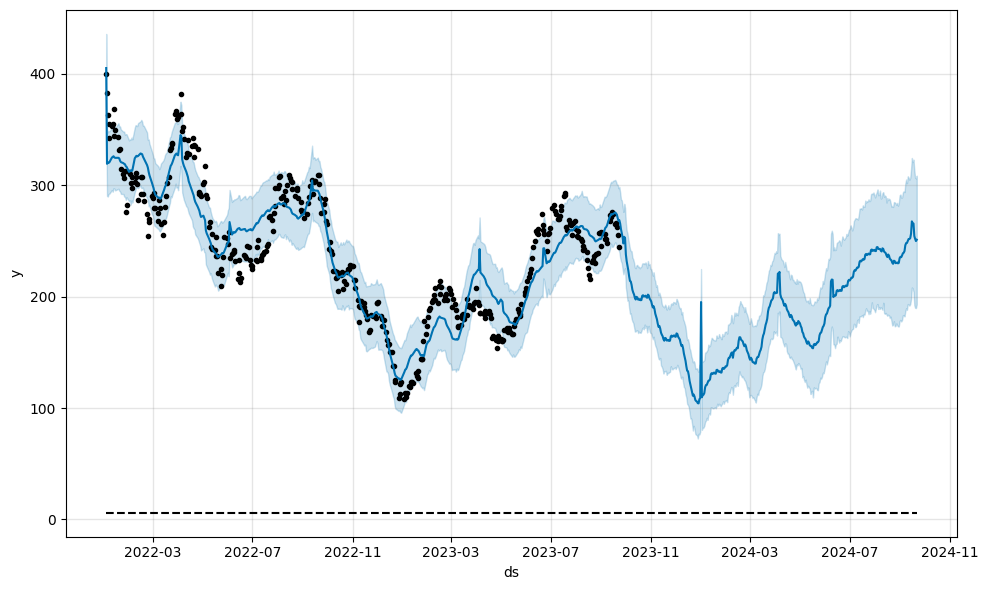

In [17]:
# 预测饱和减少


prophet_data['y'] = 10 - prophet_data['y']
prophet_data['cap'] = 6
prophet_data['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5

#构建模型
model2 = Prophet(growth='logistic')

#拟合
model2.fit(prophet_data)

#预测
fcst2 = model.predict(future)
fig = model.plot(fcst2)
plt.show()

- 评价饱和预测图的要点：

 - 拟合效果：观察蓝色线是否与已知观测值足够接近。如果蓝色线能够很好地适应观测值，表示模型的拟合效果较好。

 - 预测不确定性：关注浅蓝色区域的宽度。较宽的置信区间表示模型对未来观测值的预测不确定性较高。如果置信区间较窄，说明模型对未来数据的预测比较准确。

 - 饱和效应：观察饱和预测图中是否存在饱和效应。饱和效应通常表现为拟合曲线逐渐趋于饱和状态，并且不再随时间的推移而继续上升或下降。如果饱和效应出现在预测期内，那么模型的预测结果可能会受到饱和效应的影响。

  - 从上图看，使用效果挺好的。和不使用饱和预测方法效果一致